In [ ]:
pip install tensorflow==1.13.1

In [ ]:
pip install numpy==1.16.1

In [ ]:
pip install keras==2.0.0

In [265]:
import os
import time
import numpy as np
import tensorflow as tf
import re
import nltk
import string
import pandas 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from keras.preprocessing.text import Tokenizer

In [266]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [267]:
start_time= time.time()

In [268]:
ps = PorterStemmer()
lm = WordNetLemmatizer()

In [269]:
#데이터 가져오기
train_data = pandas.read_csv('train.csv', header=None)
test_data = pandas.read_csv('test.csv',header=None)

In [ ]:
#train 셋과 test 의 모든 단어를 정수화 시켜 tokens_word_index에 넣음
tokenizer = Tokenizer()


for title in train_data[1]:
    tokens=title.split()

    tokens_lowering = [word.lower() for word in tokens]
    tokens_lemmatizing = [lm.lemmatize(word) for word in tokens_lowering]
        
    
    tokenizer.fit_on_texts(tokens_lemmatizing)
    sequences = tokenizer.texts_to_sequences(tokens_lemmatizing)      



for title in test_data[1]:
    tokens=title.split()

    tokens_lowering = [word.lower() for word in tokens]
    tokens_lemmatizing = [lm.lemmatize(word) for word in tokens_lowering]
        
    
    tokenizer.fit_on_texts(tokens_lemmatizing)
    sequences = tokenizer.texts_to_sequences(tokens_lemmatizing)
    tokens_word_index = tokenizer.word_index


tokens_word_index = tokenizer.word_index

print(tokens_word_index)

In [145]:
# train 셋을 정수화시켜 x_train, y_train에 넣음

x_train = []
y_train = []


for i in train_data[0]:
    y_train.append(i)

for title in train_data[1]:
    int_tokens = []
    
    tokens=title.split()

    tokens_lowering = [word.lower() for word in tokens]
    tokens_lemmatizing = [lm.lemmatize(word) for word in tokens_lowering]

    for word in tokens_lemmatizing:
        try :
            int_tokens.append(tokens_word_index[word])
           
        except : continue
    x_train.append(int_tokens)



y_train= np.array(y_train)
x_train=np.array(x_train)

In [146]:
# test 셋을 정수화시켜 x_test, y_test에 넣음

x_test = []
y_test = []


for i in test_data[0]:
    y_test.append(i)


for title in test_data[1]:
    int_tokens = []
    
    tokens=title.split()

    tokens_lowering = [word.lower() for word in tokens]
    tokens_lemmatizing = [lm.lemmatize(word) for word in tokens_lowering]

    for word in tokens_lemmatizing:
        try :
            int_tokens.append(tokens_word_index[word])
            
        except : continue
    x_test.append(int_tokens)



y_test = np.array(y_test)
x_test = np.array(x_test)

In [205]:
#tokens_word_index 의 정보 확인
print(tokens_word_index)
print(type(tokens_word_index))

{'to': 4, 'in': 5, 'for': 6, '39': 7, 'on': 8, 's': 9, 'of': 10, 'a': 11, 'ap': 12, 'u': 13, 'the': 14, 'reuters': 15, 'at': 16, 'new': 17, 'with': 18, 'b': 19, 'gt': 20, 'lt': 21, 'up': 22, 'oil': 23, 'win': 24, 'and': 25, 'say': 26, 'afp': 27, 'price': 28, 'google': 29, 'by': 30, 'stock': 31, 'is': 32, 'over': 33, 'from': 34, 'gold': 35, 'microsoft': 36, 'after': 37, 'it': 38, 'iraq': 39, '1': 40, 'out': 41, 'profit': 42, 'deal': 43, 'game': 44, 'more': 45, 'take': 46, 'cut': 47, 'report': 48, 'get': 49, 'plan': 50, 'update': 51, 'china': 52, 'talk': 53, 'sale': 54, 'hit': 55, '2': 56, 'may': 57, 'back': 58, 'no': 59, 'rise': 60, '3': 61, 'set': 62, 'com': 63, 'end': 64, 'first': 65, 'be': 66, 'court': 67, 'share': 68, 'open': 69, 'buy': 70, 'not': 71, 'bush': 72, 'lead': 73, 'off': 74, 'into': 75, 'world': 76, 'attack': 77, 'team': 78, 'will': 79, 't': 80, 'kill': 81, 'fall': 82, 'down': 83, 'record': 84, 'japan': 85, 'two': 86, 'year': 87, 'go': 88, 'najaf': 89, 'home': 90, 'securi

In [208]:
## Neural network의 입력으로 사용하려면 모두 같은 길이가 되도록 조정해줘야한다.
print(len(x_train[0]), len(x_train[1]))

9 9


In [209]:
## pad_sequence() 함수를 사용하여 모든 배열의 크기가 9으로 같아지도록 처리해준다.
## 9(maxlen)보다 작을 경우는 원하는 value(word_index["<PAD>"]를 뒤쪽에('post') 추가해준다.
## 9(maxlen)보다 클 경우는 9(maxlen)으로 잘라준다.
tokens_word_index["<PAD>"] = 0

from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, value=tokens_word_index["<PAD>"], padding='post', maxlen=9)
x_test = sequence.pad_sequences(x_test, value=tokens_word_index["<PAD>"], padding='post', maxlen=9)

In [210]:
#패딩을 넣은 x_train 확인
print(x_train)

[[ 508    3   77 ...   50    0    0]
 [ 153 1651   75 ...    3  580 5507]
 [ 257   21 1898 ...    0    0    0]
 ...
 [5438  464 5058 ...    0    0    0]
 [   7 2462 4292 ... 3625  615 5413]
 [1164   46   72 ...    0    0    0]]


In [212]:
#단어의 개수 확인
print(max([max(sequence) for sequence in x_train]))

10818


In [213]:
from keras import models
from keras import layers
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [214]:
vocab_size = 10819
emb_size = 50
pretrained = False

In [258]:
model = models.Sequential()

In [259]:
if pretrained == True:
	pretrained_file = 'glove.6B.%dd.txt' % emb_size
	gensim_path = pretrained_file + '.word2vec'

	if os.path.isfile(gensim_path) == False :
		glove2word2vec(pretrained_file, gensim_path)
	else:
		pass
	pretrained_model = KeyedVectors.load_word2vec_format(gensim_path, binary=False)

	embedding_matrix = np.zeros((vocab_size, emb_size))
	for word, i in tokens_word_index.items():
		if i < vocab_size:
			try:
				embedding_matrix[i] = pretrained_model[word]
			except:
				embedding_matrix[i] = np.random.uniform(-0.25, 0.25, emb_size)
				continue
	model.add(layers.Embedding(vocab_size, emb_size, weights=[embedding_matrix]))

elif pretrained == False:
    model.add(layers.Embedding(vocab_size, emb_size))

In [260]:
#activation은 relu 와 softmax 사용
#클래스가 4개 이므로 출력층의 노드를 4개로 설정
#손실함수를 categorical_crossentropy로 설정
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation=tf.nn.relu))
model.add(layers.Dense(4, activation=tf.nn.softmax))

model.summary()

model.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, None, 50)          540950    
_________________________________________________________________
global_average_pooling1d_32  (None, 50)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 16)                816       
_________________________________________________________________
dense_55 (Dense)             (None, 4)                 68        
Total params: 541,834.0
Trainable params: 541,834.0
Non-trainable params: 0.0
_________________________________________________________________


In [261]:
#train 데이터의 개수는 120000만개
#partial_train 개수를 90000만개, val 개수를 30000만개로 나눔
x_val = x_train[:30000]
partial_x_train = x_train[30000:]
y_val = y_train[:30000]
partial_y_train = y_train[30000:]

#다중 분류이기 때문에 y를 one-hot encoding
y_val = tf.keras.utils.to_categorical(y_val)
partial_y_train = tf.keras.utils.to_categorical(partial_y_train)

#가장 앞의 인덱스 0 을 제외 (쓰레기 값)
y_val = y_val[:,1:]
partial_y_train = partial_y_train[:,1:]

In [262]:
# y.shape 
print(y_val.shape)
print(partial_y_train)

(3000, 4)
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [264]:
## training 시작
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=1000, validation_data=(x_val, y_val), verbose=1)

_, acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy : %f' % acc)

Train on 7001 samples, validate on 3000 samples
Epoch 1/20
7001/7001 [==============================] - 0s - loss: 0.2672 - acc: 0.9479 - val_loss: 0.7428 - val_acc: 0.7330
Epoch 2/20
7001/7001 [==============================] - 0s - loss: 0.2460 - acc: 0.9509 - val_loss: 0.7334 - val_acc: 0.7357
Epoch 3/20
7001/7001 [==============================] - 0s - loss: 0.2273 - acc: 0.9533 - val_loss: 0.7346 - val_acc: 0.7327
Epoch 4/20
7001/7001 [==============================] - 0s - loss: 0.2113 - acc: 0.9560 - val_loss: 0.7338 - val_acc: 0.7320
Epoch 5/20
7001/7001 [==============================] - 0s - loss: 0.1964 - acc: 0.9583 - val_loss: 0.7338 - val_acc: 0.7323
Epoch 6/20
7001/7001 [==============================] - 0s - loss: 0.1838 - acc: 0.9607 - val_loss: 0.7276 - val_acc: 0.7353
Epoch 7/20
7001/7001 [==============================] - 0s - loss: 0.1719 - acc: 0.9620 - val_loss: 0.7362 - val_acc: 0.7307
Epoch 8/20
7001/7001 [==============================] - 0s - loss: 0.1614 - a

In [231]:
## model.fit()은 학습되는 동안 측정된 정확도, 손실등을 리턴하기 때문에 그 값들을 사용하여
## 그래프를 확인할 수 있다.
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

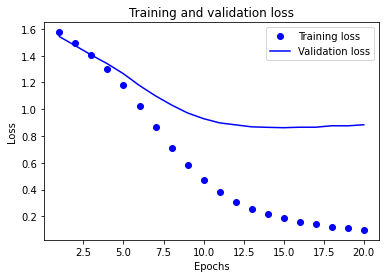

In [232]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

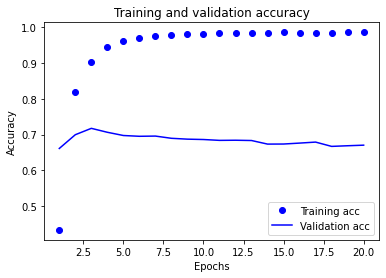

In [223]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
## 총 걸린 시간 측정
duration = time.time() - start_time
minute = int(duration / 60)
second = int(duration) % 60
print("\n< %dminutes %dseconds >\n" % (minute,second))